# A. Project Name:  IMDb Successful Movie.
- **Student Name:** Eduardo Galindez.
- **Coding Dojo Bootcamp:** Data Science.
  - **Stack:** Data Enrichment.
- **Date:** September 23th, 2022.

# B. Project Objective
Our Stakeholder Wants More Data!
- After investigating the preview of our data from Part A, the stakeholder realized that there is no financial information included in the IMDB data (e.g. budget or revenue).
    - Our stakeholder identified The Movie Database ([TMDB](https://www.themoviedb.org/)) as a great source of financial data . Thankfully, TMDB offers a free API for programmatic access to their data!
- The stakeholder wants we to extract the budget, revenue, and MPAA Rating (G/PG/PG-13/R), which is also called "Certification".

# C. Project Statement


### Specifications:

Our stakeholder would like you to extract and save the results for movies that meet all of the criteria established in Part A of the project.

As a proof-of-concept, they requested we perform a test extraction of movies that started in 2000 or 2001

Each year should be saved as a separate .csv.gz file

Confirm Your API Function works.

- In order to ensure our function for extracting movie data from TMDB is working, test the function on these 2 movie ids: tt0848228 ("The Avengers") and tt0332280 ("The Notebook"). Make sure that the function runs without error and that it returns the correct movie's data for both test ids.

- Once you have retrieved and saved the final results to 2 separate .csv.gz files, move on to a Exploratory Data Analysis to explore the following questions.

### Exploratory Data Analysis
1. Load in your csv.gz's of results for each year extracted.
 - Concatenate the data into 1 dataframe for the remainder of the analysis.
2. Once you have your data from the API, they would like we to perform some light EDA to show:
 - How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
 - Exclude any movies with 0's for budget AND revenue from the remaining visualizations.
 - How many movies are there in each of the certification categories (G/PG/PG-13/R)?
 - What is the average revenue per certification category?
 - What is the average budget per certification category?

### Deliverable:

After we have joined the tmdb results into 1 dataframe in the EDA Notebook:

- Save a final merged .csv.gz of all of the tmdb api data.
- The file name should be "tmdb_results_combined.csv.gz".
- Make sure this is pushed to our GitHub repository along with all of the code.
- One code file for API calls.
- One code file for EDA.
- Submit the link.

# D. Project Development

## 1.- Libraries & Functions

In [1]:
# Libraries.
import numpy as np
import pandas as pd
import tmdbsimple as tmdb 
import matplotlib.pyplot as plt
import seaborn as sns
import os, time, json
os.makedirs('Data',exist_ok=True)

from tqdm.notebook import tqdm_notebook

In [2]:
# Function to get the certification.
def get_movie_certification(movie_id):
    movie = tmdb.Movies(movie_id)
    info = movie.info()
    releases = movie.releases()
    
    for c in releases['countries']:
        if c['iso_3166_1'] == "US":
            info['certifcation'] = c['certification']     
    return info

In [3]:
# Function to create our .json file.
##  Adapted from: https://www.geeksforgeeks.org/append-to-json-file-using-python/

def write_json(new_data, filename):    
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        ## Choose extend or append
        if (type(new_data) == list) & (type(file_data) == list):
            file_data.extend(new_data)
        else:
             file_data.append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file)

## 2.-  Data & Connection

### 2.1.- API connection


In [4]:
# Loading API credentials.
with open('/Users/eduar/.secret/tmdb_api.json', 'r') as file:
    login = json.load(file)
login.keys()

dict_keys(['api-key'])

In [5]:
# Import credentials.
tmdb.API_KEY =  login['api-key']

In [6]:
# Checking the connection with 'The Avengers'.
the_avengers_movie = tmdb.Movies('tt0848228')
the_avengers_info = the_avengers_movie.info()
the_avengers_info['budget']

220000000

In [7]:
# Checking the connection with 'The Notebook'.
the_notebook_movie = tmdb.Movies('tt0332280')
the_notebook_info = the_notebook_movie.info()
the_notebook_info['budget']

29000000

### 2.2.- Mount and loading data.

In [8]:
# Specify folder for saving data.
FOLDER = "Data/"
os.makedirs(FOLDER, exist_ok=True)
os.listdir(FOLDER)

['.ipynb_checkpoints',
 'Chunk data per database',
 'final_tmdb_data_2000.csv.gz',
 'final_tmdb_data_2001.csv.gz',
 'Original data',
 'title_akas_combined.csv.gz',
 'title_basics_combined.csv.gz',
 'title_ratings_combined.csv.gz',
 'tmdb_api_results_2000.json',
 'tmdb_api_results_2001.json',
 'tmdb_results_combined.csv.gz']

In [9]:
# Load in the dataframe from Part A:
basics_df = pd.read_csv('./Data/title_basics_combined.csv.gz', low_memory = False)

In [10]:
# Let's drop the column 'endYear' as was reported in Section E of Part A notebook.
basics_df = basics_df.drop(columns=['endYear'])

In [11]:
# Convert 'startYear' column dtype to int.
basics_df['startYear'] = basics_df['startYear'].astype(int)

In [12]:
# Let's confirm we don't have missing data.
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79858 entries, 0 to 79857
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          79858 non-null  object
 1   titleType       79858 non-null  object
 2   primaryTitle    79858 non-null  object
 3   originalTitle   79858 non-null  object
 4   isAdult         79858 non-null  int64 
 5   startYear       79858 non-null  int32 
 6   runtimeMinutes  79858 non-null  int64 
 7   genres          79858 non-null  object
dtypes: int32(1), int64(2), object(5)
memory usage: 4.6+ MB


In [13]:
# General look of the dataframe.
basics_df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0108549,movie,West from North Goes South,West from North Goes South,0,2004,96,"Comedy,Mystery"
1,tt0113026,movie,The Fantasticks,The Fantasticks,0,2000,86,"Musical,Romance"
2,tt0113092,movie,For the Cause,For the Cause,0,2000,100,"Action,Adventure,Drama"
3,tt0114447,movie,The Silent Force,The Silent Force,0,2001,90,Action
4,tt0115937,movie,Consequence,Consequence,0,2000,91,Drama
...,...,...,...,...,...,...,...,...
79853,tt9916170,movie,The Rehearsal,O Ensaio,0,2019,51,Drama
79854,tt9916190,movie,Safeguard,Safeguard,0,2020,95,"Action,Adventure,Thriller"
79855,tt9916270,movie,Il talento del calabrone,Il talento del calabrone,0,2020,84,Thriller
79856,tt9916362,movie,Coven,Akelarre,0,2020,92,"Drama,History"


In [14]:
# Create Required Lists for the our function.
YEARS_TO_GET = [2000, 2001]
errors = [ ]

In [15]:
# Start of OUTER loop
for YEAR in tqdm_notebook(YEARS_TO_GET, desc='YEARS', position=0):
    # Defining the JSON file to store results for year.
    JSON_FILE = f'{FOLDER}tmdb_api_results_{YEAR}.json'
    # Check if the file exists.
    file_exists = os.path.isfile(JSON_FILE)
    # If it does exist: notify me.
    if file_exists == True:
        print(f'{YEAR} {JSON_FILE} already exists.')
    # If it does not exist: create it.
    else:
    # Save an empty dict with just "imdb_id" to the new json file.
        with open(JSON_FILE,'w') as file:
            json.dump([{'imdb_id':0}], file)

    # Saving new year as the current df.        
    df = basics_df.loc[basics_df['startYear'] == YEAR].copy()
    # Saving movie ids to list.
    movie_ids = df['tconst'].copy()
    
    # Load existing data from json into a dataframe called "previous_df"
    previous_df = pd.read_json(JSON_FILE)
    
    # Filter out any ids that are already in the JSON_FILE.
    movie_ids_to_get = movie_ids[~movie_ids.isin(previous_df['imdb_id'])]

    
    # Start of INNER Loop.
    if file_exists == False:
        for movie_id in tqdm_notebook(movie_ids_to_get,
                                      desc=f'Movies from {YEAR}',
                                      position=1,
                                      leave=True):
            try:
                # Retrieve then data for the movie id.
                temp = get_movie_certification(movie_id)  
                # Append/extend results to existing file using a pre-made function.
                write_json(temp,JSON_FILE)
                # Short 20 ms sleep to prevent overwhelming server.
                time.sleep(0.02)

            except Exception as e:
                errors.append([movie_id, e])

        final_year_df = pd.read_json(JSON_FILE)
        final_year_df.to_csv(f"{FOLDER}final_tmdb_data_{YEAR}.csv.gz", compression="gzip", index=False)

print(f"- Total errors: {len(errors)}")

YEARS:   0%|          | 0/2 [00:00<?, ?it/s]

2000 Data/tmdb_api_results_2000.json already exists.
2001 Data/tmdb_api_results_2001.json already exists.
- Total errors: 0


In [16]:
# Let's load data from 2000 & 2001.
movies_from_2000_df = pd.read_csv('./Data/final_tmdb_data_2000.csv.gz', low_memory = False)
movies_from_2001_df = pd.read_csv('./Data/final_tmdb_data_2001.csv.gz', low_memory = False)

In [17]:
# Let's concatenate both datasets.

## Upload new datasets.
movies_from_2000 = pd.read_csv('./Data/final_tmdb_data_2000.csv.gz')
movies_from_2001 = pd.read_csv('./Data/final_tmdb_data_2001.csv.gz')

## Concatenate them.
movies_from_2000_and_2001_df = pd.concat([movies_from_2000, movies_from_2001])
movies_from_2000_and_2001_df.head(5)

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.10,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.00,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,1984.0,PG


In [18]:
# Check for invalid data in 'imdb_id'.
movies_from_2000_and_2001_df[movies_from_2000_and_2001_df['imdb_id'] == '0']

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Let's drop rows with values=0.
movies_from_2000_and_2001_df.drop(index=movies_from_2000_df.index[0], axis=0, inplace=True)
movies_from_2000_and_2001_df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,0.000,0.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.wkw-inthemoodforlove.com/,843.0,cn,花樣年華,...,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.110,1984.0,PG
5,tt0118852,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,49511.0,en,Chinese Coffee,...,0.0,99.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,There's a fine line between friendship and bet...,Chinese Coffee,0.0,6.851,47.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284,tt7797670,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956214.0,en,Edmund Kemper Part 2: La Mort C'est La Vie,...,0.0,91.0,[],Released,NaN,Edmund Kemper Part 2: La Mort C'est La Vie,0.0,0.000,0.0,NaN
1285,tt7797790,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",NaN,956219.0,en,Edmund Kemper Part 3: La mort sévit,...,0.0,72.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,NaN,Edmund Kemper Part 3: La mort sévit,0.0,0.000,0.0,NaN
1286,tt8665056,0.0,NaN,NaN,0.0,"[{'id': 37, 'name': 'Western'}]",http://skeletoncreekproductions.com/p-movie-br...,885436.0,en,Guns Along The Bravo,...,0.0,85.0,[],Released,Evil came to the Southwest until three blazing...,Guns Along The Bravo,0.0,0.000,0.0,NaN
1287,tt8795764,0.0,NaN,NaN,0.0,"[{'id': 27, 'name': 'Horror'}]",https://www.utahwolf.com/films/coming-soon-new...,871624.0,en,New Breed,...,0.0,57.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,New Breed,0.0,0.000,0.0,NR


In [20]:
# Have a general look of the data.
movies_from_2000_and_2001_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2495 entries, 1 to 1288
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2495 non-null   object 
 1   adult                  2495 non-null   float64
 2   backdrop_path          1307 non-null   object 
 3   belongs_to_collection  197 non-null    object 
 4   budget                 2495 non-null   float64
 5   genres                 2495 non-null   object 
 6   homepage               175 non-null    object 
 7   id                     2495 non-null   float64
 8   original_language      2495 non-null   object 
 9   original_title         2495 non-null   object 
 10  overview               2445 non-null   object 
 11  popularity             2495 non-null   float64
 12  poster_path            2205 non-null   object 
 13  production_companies   2495 non-null   object 
 14  production_countries   2495 non-null   object 
 15  rele

**Notes:**
- At this point we have identified some missing data. Keeping the focus on our target columns, there is no missing data in 'Budget' or ' Revenue' but in 'Certification' we have 1,701 missing data (~68%).
- Let's see how this could affect pot analysis in Section 3.

In [21]:
# Statistical summary.
movies_from_2000_and_2001_df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,2495.000000,2.495000e+03,2.495000e+03,2495.000000,2.495000e+03,2495.000000,2495.000000,2495.000000,2495.000000
mean,0.002405,5.310254e+06,1.715279e+05,5.274156,1.118161e+07,92.336673,0.001603,4.551417,261.835271
std,0.048990,1.720655e+07,2.067750e+05,14.034905,5.307544e+07,30.349509,0.040016,2.486312,1244.436247
min,0.000000,0.000000e+00,1.600000e+01,0.600000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,2.663350e+04,0.735000,0.000000e+00,87.000000,0.000000,3.293000,1.000000
50%,0.000000,0.000000e+00,7.802700e+04,1.746000,0.000000e+00,94.000000,0.000000,5.300000,7.000000
75%,0.000000,0.000000e+00,2.687660e+05,4.939000,0.000000e+00,104.000000,0.000000,6.300000,41.000000
max,1.000000,1.400000e+08,1.006938e+06,267.039000,9.764756e+08,345.000000,1.000000,10.000000,23252.000000


In [22]:
# Download our concatenated database.
movies_from_2000_and_2001_df.to_csv(f'./Data/tmdb_results_combined.csv.gz', compression='gzip', index=False)

### 2.3.- Get Budget, Revenue and Certification per movie tested in Section 2.1.

#### 2.3.1.- The Avengers

In [23]:
# Budget.
budget_avengers = the_avengers_info['budget']
print(f'The budget for The Avengers was USD {budget_avengers:,}.')

The budget for The Avengers was USD 220,000,000.


In [24]:
# Revenue.
revenue_avengers = the_avengers_info['revenue']
print(f'The revenue for The Avengers was USD {revenue_avengers:,}.')

The revenue for The Avengers was USD 1,518,815,515.


In [25]:
# Impact of the revenue (Return of Investment).
avengers_roi = round((revenue_avengers - budget_avengers)/budget_avengers *100, 2)
print(f'The ROI for The Avengers was {avengers_roi}%.')

The ROI for The Avengers was 590.37%.


In [26]:
# Certification (MPAA Rating).
avengers_certification = get_movie_certification('tt0848228')
avengers_certification

{'adult': False,
 'backdrop_path': '/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg',
 'belongs_to_collection': {'id': 86311,
  'name': 'The Avengers Collection',
  'poster_path': '/yFSIUVTCvgYrpalUktulvk3Gi5Y.jpg',
  'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'},
 'budget': 220000000,
 'genres': [{'id': 878, 'name': 'Science Fiction'},
  {'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'}],
 'homepage': 'https://www.marvel.com/movies/the-avengers',
 'id': 24428,
 'imdb_id': 'tt0848228',
 'original_language': 'en',
 'original_title': 'The Avengers',
 'overview': 'When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recruitment effort begins!',
 'popularity': 242.315,
 'poster_path': '/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg',
 'production_companies': [{'id': 420,
   'logo_path

#### 2.3.2.- The Notebook

In [27]:
# Budget.
budget_notebook = the_notebook_info['budget']
print(f'The budget for The Notebook was USD {budget_notebook:,}.')

The budget for The Notebook was USD 29,000,000.


In [28]:
# Revenue.
revenue_notebook = the_notebook_info['revenue']
print(f'The revenue for The Notebook was USD {revenue_notebook:,}.')

The revenue for The Notebook was USD 115,603,229.


In [29]:
# Impact of the revenue (Return of Investment).
notebook_roi = round((revenue_notebook - budget_notebook)/budget_notebook *100, 2)
print(f'The ROI for The Notebook was {notebook_roi}%.')

The ROI for The Notebook was 298.63%.


In [30]:
# Certification (MPAA Rating).
notebook_certification = get_movie_certification('tt0332280')
notebook_certification

{'adult': False,
 'backdrop_path': '/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg',
 'belongs_to_collection': None,
 'budget': 29000000,
 'genres': [{'id': 10749, 'name': 'Romance'}, {'id': 18, 'name': 'Drama'}],
 'homepage': 'http://www.newline.com/properties/notebookthe.html',
 'id': 11036,
 'imdb_id': 'tt0332280',
 'original_language': 'en',
 'original_title': 'The Notebook',
 'overview': "An epic love story centered around an older man who reads aloud to a woman with Alzheimer's. From a faded notebook, the old man's words bring to life the story about a couple who is separated by World War II, and is then passionately reunited, seven years later, after they have taken different paths.",
 'popularity': 63.249,
 'poster_path': '/rNzQyW4f8B8cQeg7Dgj3n6eT5k9.jpg',
 'production_companies': [{'id': 12,
   'logo_path': '/iaYpEp3LQmb8AfAtmTvpqd4149c.png',
   'name': 'New Line Cinema',
   'origin_country': 'US'},
  {'id': 1565, 'logo_path': None, 'name': 'Avery Pix', 'origin_country': 'US'},
  {'id': 26

In [31]:
# Summary between both movies.
test_ids = ['tt0848228', 'tt0332280']
results = []

for movie_id in test_ids:  
    try:
        movie_info = get_movie_certification(movie_id)
        results.append(movie_info)        
    except: 
        pass
    
pd.DataFrame(results)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
0,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,"{'id': 86311, 'name': 'The Avengers Collection...",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",https://www.marvel.com/movies/the-avengers,24428,tt0848228,en,The Avengers,...,1518815515,143,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Some assembly required.,The Avengers,False,7.705,27531,PG-13
1,False,/qom1SZSENdmHFNZBXbtJAU0WTlC.jpg,None,29000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",http://www.newline.com/properties/notebookthe....,11036,tt0332280,en,The Notebook,...,115603229,123,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Behind every great love is a great story.,The Notebook,False,7.880,9823,PG-13


## 3.- Visual Data Exploration

### 3.1.- How many movies had at least some valid financial information (values > 0 for budget OR revenue)?
Please exclude any movies with 0's for budget AND revenue from the remaining visualizations.

In [32]:
# Create the filter.
movies_with_0_budget_and_revenue = movies_from_2000_and_2001_df[(movies_from_2000_and_2001_df['budget'] > 0) \
                                                               & (movies_from_2000_and_2001_df['revenue'] > 0)]

In [33]:
# Formating the result.
valid_financial_info = len(movies_with_0_budget_and_revenue)
print(f'We identified {valid_financial_info} movies that had at least some valid finalcial information.')

valid_fin_info_impact = round(valid_financial_info/len(movies_from_2000_and_2001_df)*100,2)
print(f'This means that just the {valid_fin_info_impact}% are "profitable".')

We identified 348 movies that had at least some valid finalcial information.
This means that just the 13.95% are "profitable".


In [34]:
# Checking the general info.
movies_with_0_budget_and_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 4 to 1246
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                348 non-null    object 
 1   adult                  348 non-null    float64
 2   backdrop_path          336 non-null    object 
 3   belongs_to_collection  84 non-null     object 
 4   budget                 348 non-null    float64
 5   genres                 348 non-null    object 
 6   homepage               56 non-null     object 
 7   id                     348 non-null    float64
 8   original_language      348 non-null    object 
 9   original_title         348 non-null    object 
 10  overview               348 non-null    object 
 11  popularity             348 non-null    float64
 12  poster_path            348 non-null    object 
 13  production_companies   348 non-null    object 
 14  production_countries   348 non-null    object 
 15  relea

**Notes:**
- We identified there is still missing data in our 'certification' column, even after filtering.
- The impact of these missing data has been reduced to 12.6%.

### 3.2.- How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [35]:
# Let's have a closer look of our 'certifcation' column.
movies_from_2000_and_2001_df['certifcation'].value_counts()

R          452
PG-13      180
NR          66
PG          64
G           24
NC-17        6
Unrated      1
-            1
Name: certifcation, dtype: int64

In [36]:
# Locate '-' value.
movies_from_2000_and_2001_df[movies_from_2000_and_2001_df['certifcation'] == '-']

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certifcation
819,tt0282526,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,172550.0,it,Giorni,...,0.0,90.0,"[{'english_name': 'Italian', 'iso_639_1': 'it'...",Released,NaN,Days,0.0,5.0,7.0,-


In [37]:
# Let's fix the odd value located in row 819.
movies_from_2000_and_2001_df.loc[819, 'certifcation'] = 'Unrated'

In [38]:
# Set dataframe to plot.
movies_from_2000_and_2001_df['certifcation'].value_counts(ascending=False)

R          452
PG-13      180
NR          66
PG          64
G           24
NC-17        6
Unrated      3
Name: certifcation, dtype: int64

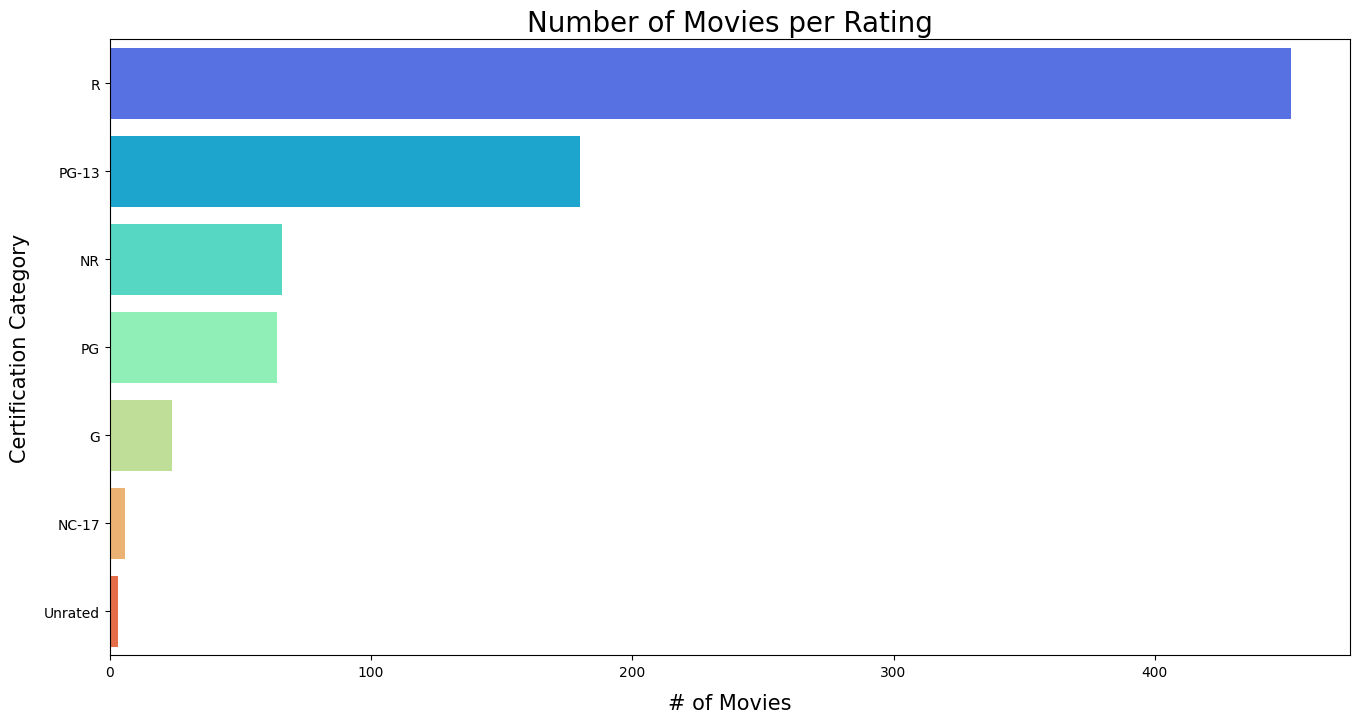

In [39]:
# Let's plot our horizontal bar graph.
## Code inspired in https://machinelearningknowledge.ai/seaborn-countplot-tutorial-for-beginners/
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.countplot(data=movies_from_2000_and_2001_df, y='certifcation', palette='rainbow',
                   order=movies_from_2000_and_2001_df['certifcation'].value_counts(ascending=False).index)
ax.set_ylabel('Certification Category', fontsize=15,labelpad=10)
ax.set_xlabel('# of Movies', fontsize=15,labelpad=10)
ax.set_title('Number of Movies per Rating', fontsize=20)
plt.savefig('number_movies_rating.png', pad_inches=1, bbox_inches='tight');

### 3.3.- What is the average revenue per certification category?

In [40]:
# Let's have a look of the data.
movies_from_2000_and_2001_df.groupby('certifcation')['revenue'].mean().sort_values(ascending=False)

certifcation
G          7.216332e+07
PG-13      7.158384e+07
PG         6.143535e+07
R          1.682113e+07
NR         2.289235e+06
NC-17      0.000000e+00
Unrated    0.000000e+00
Name: revenue, dtype: float64

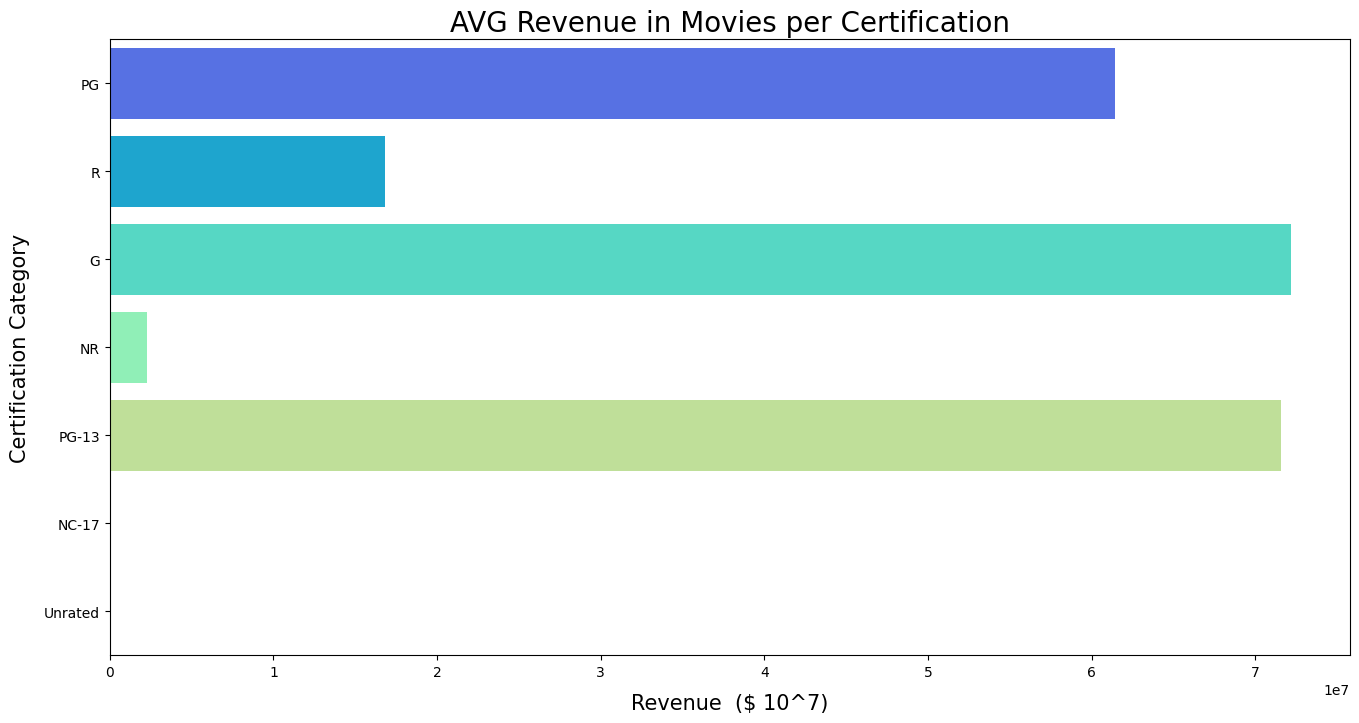

In [41]:
# Plot the results.
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data=movies_from_2000_and_2001_df, x='revenue', y='certifcation', palette='rainbow', ci=None)
ax.set_ylabel('Certification Category', fontsize=15,labelpad=10)
ax.set_xlabel('Revenue  ($ 10^7)', fontsize=15,labelpad=10)
ax.set_title('AVG Revenue in Movies per Certification', fontsize=20)
plt.savefig('avg_revenue_certification', pad_inches=1, bbox_inches='tight');

### 3.4.- What is the average budget per certification category?

In [42]:
# Let's have a look of the data.
movies_from_2000_and_2001_df.groupby('certifcation')['budget'].mean().sort_values(ascending=False)

certifcation
PG-13      3.113838e+07
PG         2.459766e+07
G          2.383333e+07
R          9.998904e+06
NR         1.622729e+06
NC-17      0.000000e+00
Unrated    0.000000e+00
Name: budget, dtype: float64

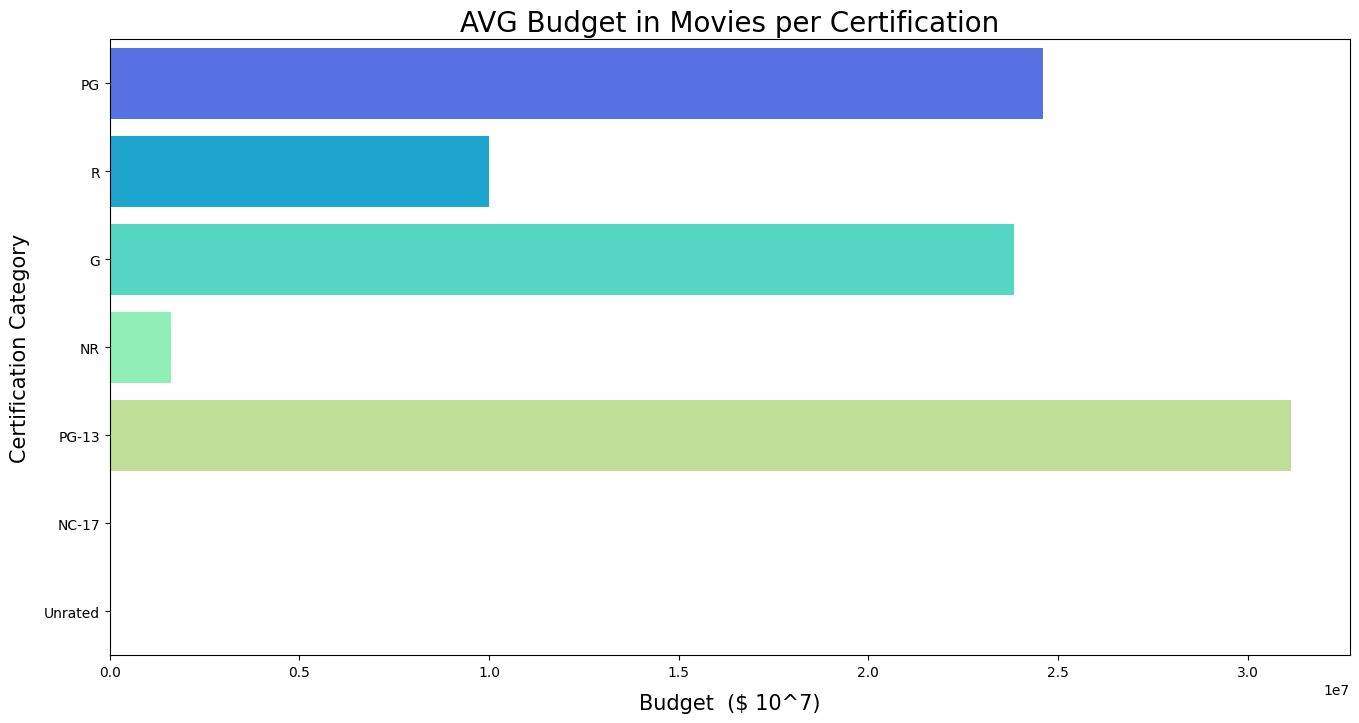

In [43]:
# Plot the results.
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.barplot(data=movies_from_2000_and_2001_df, x='budget', y='certifcation', palette='rainbow', ci=None)
ax.set_ylabel('Certification Category', fontsize=15,labelpad=10)
ax.set_xlabel('Budget  ($ 10^7)', fontsize=15,labelpad=10)
ax.set_title('AVG Budget in Movies per Certification', fontsize=20)
plt.savefig('avg_budget_certification', pad_inches=1, bbox_inches='tight');

### 3.5.- What is the average ROI (Return of Investment) per certification category?
- In Section 2.3, we calculated the ROI of The Avengers and The Notebook movies. 
- In this Section we are going to analyze if those financial performance are usual in movies, in order to evaluate which type of movie are more profitable related with MPAA Rating (certification).

In [44]:
# Let's calculate the ROI per movie.

## Create a function to have a cleaner code.
def calculate_roi(df):
  df['ROI'] = (df['revenue'] - df['budget']) / df['budget'] * 100
  return df

## Call the function.
ROI_2000_2001_df = calculate_roi(movies_with_0_budget_and_revenue)

C:\Users\eduar\AppData\Local\Temp\ipykernel_8344\1823789866.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROI'] = (df['revenue'] - df['budget']) / df['budget'] * 100


In [45]:
# Statistical summary.
ROI_2000_2001_df['ROI'].describe()

count     348.000000
mean      184.083996
std       593.639612
min       -99.883000
25%       -32.713193
50%        55.335011
75%       216.279648
max      8469.968667
Name: ROI, dtype: float64

In [46]:
# Formating the findings.
movies_with_positive_ROI = round(len(ROI_2000_2001_df[ROI_2000_2001_df['ROI'] > 0])\
                                 / len(movies_with_0_budget_and_revenue) * 100, 2)
print(f'The {movies_with_positive_ROI}% of the movies from 2000 & 2001 with valid financial info have positive ROI.')

total_movies_with_positive_ROI = round(len(ROI_2000_2001_df[ROI_2000_2001_df['ROI'] > 0])\
                                 / len(movies_from_2000_and_2001_df) * 100, 2)
print(f'The {total_movies_with_positive_ROI}% of the movies from 2000 & 2001 were profitable.')

The 63.51% of the movies from 2000 & 2001 with valid financial info have positive ROI.
The 8.86% of the movies from 2000 & 2001 were profitable.


certifcation
PG       472.344304
NR       199.218408
G        191.259495
R        176.307125
PG-13    137.312449
Name: ROI, dtype: float64


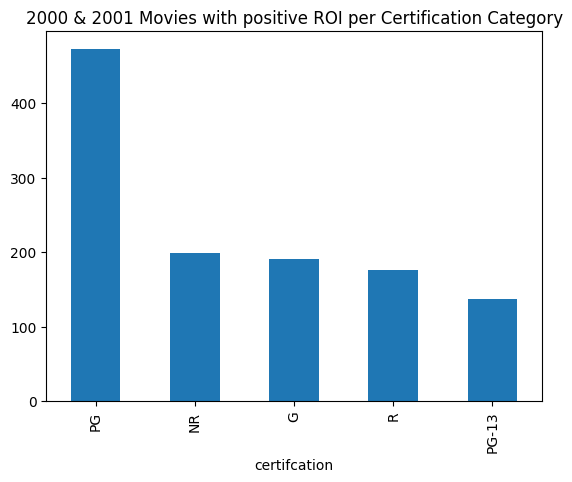

In [57]:
# Let's see the behavior per certification category.
ROI_to_plot=ROI_2000_2001_df.groupby('certifcation')['ROI'].mean().sort_values(ascending=False)
ROI_to_plot.plot(kind='bar', title='2000 & 2001 Movies with positive ROI per Certification Category')
plt.savefig('ROI_2000_2001.png', pad_inches=1, bbox_inches='tight');
print(ROI_to_plot)

# E. Conclusions

- In 2000 and 2001, rating R accounted for almost 67% of the movies made, but was not among the top three in profitability.
- During the same time period, PG movies accounted for 8% of films made, and they were identified as the most profitable.
- There were 8.86% of projects with positive ROI, which raised suspicions about the data's reliability. There might need to be a more in-depth study.